In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
plt.rcParams.update({'font.size': 15})

# Basic properties of sample mean, variance, and sum of squares

Take a $K$-sized sample of Gaussian random variables with given mean and variance.

Verify that the normalised sample mean follows a Student $t$-distribution with $K-1$ degrees of freedom, and that the sum of normalised squares and the unbised variance are $\chi_2$ random variables with $K$ and $K-1$ degrees of freedom.

In [19]:
N = int(1e6)
K = 10

expectation        = 3
standard_deviation = 2

sample  = stats.norm.rvs(loc=expectation, scale=standard_deviation, size=(N,K))
squares = ((sample-expectation)/standard_deviation)**2

Compute normalised sample mean, the ratio between unbiased variance and standard deviation times $K-1$, and sum of normalised squares.

In [20]:
sample_mean = np.mean(sample,axis=1)
sample_varn = np.var(sample,axis=1, ddof=1)

normalised_mean = (sample_mean-expectation)*np.sqrt(K)/np.sqrt(sample_varn)
normalised_varn = (K-1)*sample_varn/standard_deviation**2

square_sum  = squares.sum(axis=1)

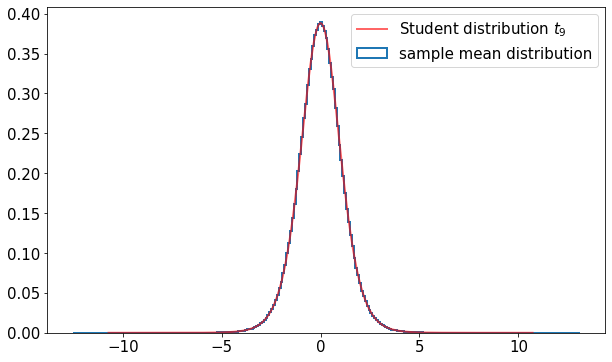

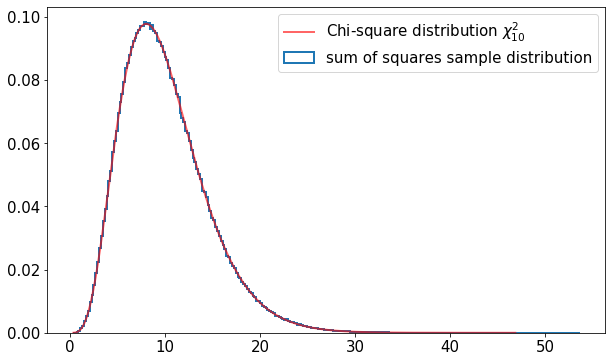

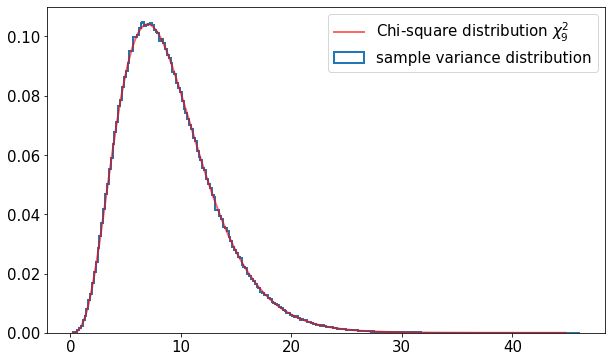

In [15]:
plt.figure(figsize=(10,6))
x = np.linspace(stats.t.ppf(1e-6, K-1),stats.t.ppf(1-1e-6, K-1), 600)
plt.plot(x, stats.t.pdf(x, K-1),'r-', lw=2, alpha=0.6, label=r"Student distribution $t_{{{}}}$".format(K-1))
plt.hist(normalised_mean,density= True,bins=271,label="sample mean distribution",histtype='step',lw=2)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
x = np.linspace(stats.chi2.ppf(1e-6, K),stats.chi2.ppf(1-1e-6, K), 600)
plt.plot(x, stats.chi2.pdf(x, K),'r-', lw=2, alpha=0.6, label=r"Chi-square distribution $\chi^2_{{{}}}$".format(K))
plt.hist(square_sum,density= True,bins=271,label="sum of squares sample distribution",histtype='step',lw=2)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
x = np.linspace(stats.chi2.ppf(1e-6, K-1),stats.chi2.ppf(1-1e-6, K-1), 600)
plt.plot(x,stats.chi2.pdf(x, K-1),'r-', lw=2, alpha=0.6, label=r"Chi-square distribution $\chi^2_{{{}}}$".format(K-1))
plt.hist(normalised_varn,density=True,bins=271,label="sample variance distribution",histtype='step',lw=2)
plt.legend()
plt.show()